In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../TMSIM-500/data.csv', sep=',', encoding='utf-8')
df.head(5)

,Type,Case ID,Contested Trademark,Earlier Trademark,Visual Similarity,Aural Similarity,Conceptual Similarity,Degree of Attention,Distinctiveness,Opposition Outcome,Item Similarity,Outcome,Contested Goods and Services,Earlier Goods and Services
0,word,003178074,TP HOME,TP,4.0,4.0,0.0,3.0,3.0,upheld,3,upheld,plates for diffusing aromatic oil,air fragrancing preparations
1,word,003178074,TP HOME,TP,4.0,4.0,0.0,3.0,3.0,upheld,3,upheld,aromatic oil diffusers other than reed diffuse...,air fragrancing preparations
2,word,003178074,TP HOME,TP,4.0,4.0,0.0,3.0,3.0,upheld,3,upheld,pomanders [containers],air fragrancing preparations
3,word,003178074,TP HOME,TP,4.0,4.0,0.0,3.0,3.0,upheld,3,upheld,containers for pot pourri,air fragrancing preparations
4,word,003178074,TP HOME,TP,4.0,4.0,0.0,3.0,3.0,upheld,3,upheld,perfume burners,air fragrancing preparations


# Analyzing the number of Samples per Class and Type

Create a table showing how many samples are in the dataset, which type they have and which class distribution. As the dataset contains opposition cases which inherently consist of multiple comparisons, the number of samples is not equal to the number of trademarks. For this reason, the statistics for trademarks and the statistics for comparisons will differ.

In [33]:
def add_count_to_dict(d: dict, df: pd.DataFrame, key: str, types: list[str], outcomes: list[str], target_value: str):
    if key not in d:
        d[key] = {}
    for t in types:
        if t not in d[key]:
            d[key][t] = {}
        sub_df = df.loc[df['Type'] == t]
        d[key][t]['total'] = len(sub_df)
        for outcome in outcomes:
            d[key][t][outcome] = len(sub_df.loc[sub_df[target_value] == outcome])
    return d

stats = {}

stats = add_count_to_dict(stats, df, 'comparison-level', ['word', 'figurative'], outcomes=['upheld', 'rejected'], target_value='Outcome')
stats = add_count_to_dict(stats, df.drop_duplicates(subset=['Case ID']), 'tm-level', ['word', 'figurative'], outcomes=['upheld', 'rejected', 'partially upheld'], target_value='Opposition Outcome')

stats

{'comparison-level': {'word': {'total': 6516,
   'upheld': 4091,
   'rejected': 2425},
  'figurative': {'total': 5302, 'upheld': 2594, 'rejected': 2708}},
 'tm-level': {'word': {'total': 250,
   'upheld': 135,
   'rejected': 40,
   'partially upheld': 75},
  'figurative': {'total': 250,
   'upheld': 98,
   'rejected': 76,
   'partially upheld': 76}}}

# Analyzing the distribution of class labels

Opposition decisions can generally have three outcomes: rejected, partially upheld, or upheld. This variable is referred to as "Opposition Outcome" and it is the raw label coming from the data source itself.

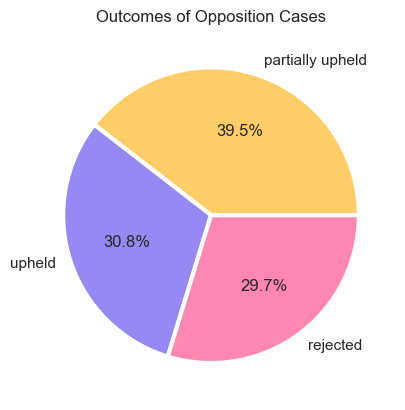

In [43]:
# color order: blue, green, red
colors = ['#FFCE68', '#9789f3', '#FF87B1']

plot = df['Opposition Outcome'].value_counts().plot.pie(ylabel='', title="Outcomes of Opposition Cases", legend=False,
                                                        autopct='%1.1f%%', wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
                                                        colors=colors, startangle=0)
fig = plot.get_figure()
fig.savefig('./dataset stats/opposition_outcomes.png')

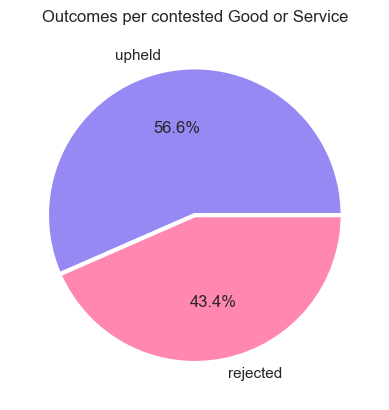

In [44]:
# color order: green, red
colors = ['#9789f3', '#FF87B1']

plot = df['Outcome'].value_counts().plot.pie(ylabel='', title="Outcomes per contested Good or Service", legend=False,
                                                        autopct='%1.1f%%', wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
                                                        colors=colors, startangle=0)
fig = plot.get_figure()
fig.savefig('./dataset stats/detailed_outcomes.png')

# Analyzing correlations between variables

Compute the correlation matrix for all features and the output variable.

In [34]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

corr_cols = df[['Type', 'Visual Similarity', 'Aural Similarity', 'Conceptual Similarity', 'Degree of Attention', 'Distinctiveness', 'Opposition Outcome', 'Item Similarity', 'Outcome']]
corr_cols.loc[corr_cols['Type'] == 'word', 'Type'] = 1
corr_cols.loc[corr_cols['Type'] == 'figurative', 'Type'] = 0
corr_cols.loc[corr_cols['Outcome'] == 'upheld', 'Outcome'] = 1
corr_cols.loc[corr_cols['Outcome'] == 'rejected', 'Outcome'] = 0
corr_cols.loc[corr_cols['Opposition Outcome'] == 'upheld', 'Opposition Outcome'] = 2
corr_cols.loc[corr_cols['Opposition Outcome'] == 'partially upheld', 'Opposition Outcome'] = 1
corr_cols.loc[corr_cols['Opposition Outcome'] == 'rejected', 'Opposition Outcome'] = 0

In [35]:
corr_cols.head()

,Type,Visual Similarity,Aural Similarity,Conceptual Similarity,Degree of Attention,Distinctiveness,Opposition Outcome,Item Similarity,Outcome
0,1,4.0,4.0,0.0,3.0,3.0,2,3,1
1,1,4.0,4.0,0.0,3.0,3.0,2,3,1
2,1,4.0,4.0,0.0,3.0,3.0,2,3,1
3,1,4.0,4.0,0.0,3.0,3.0,2,3,1
4,1,4.0,4.0,0.0,3.0,3.0,2,3,1


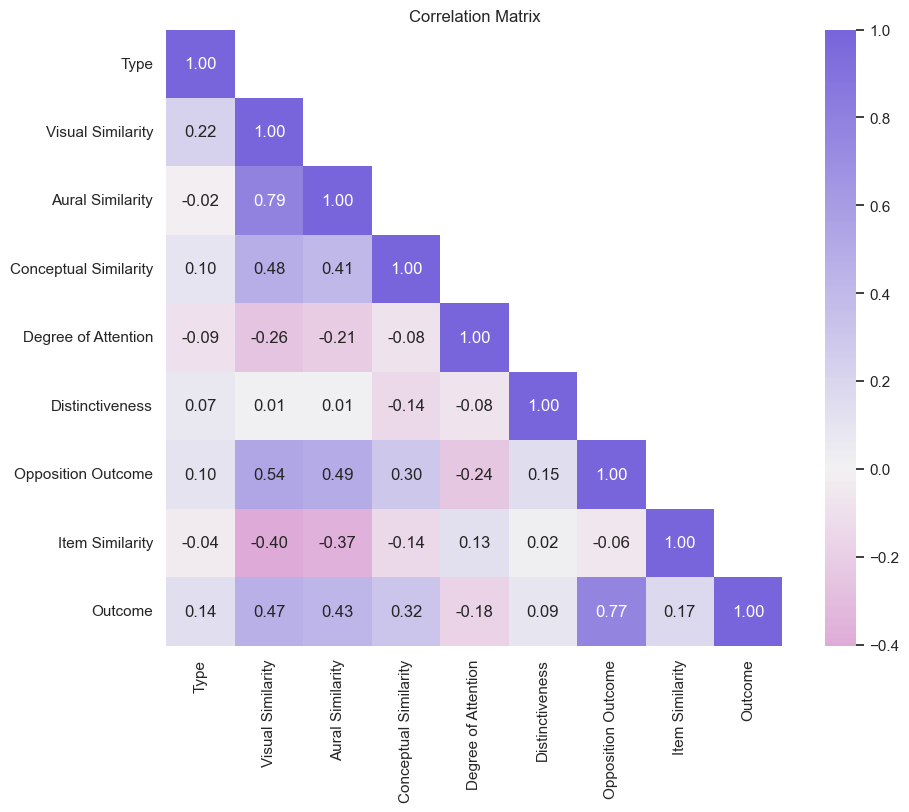

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_cols = df[['Type', 'Visual Similarity', 'Aural Similarity', 'Conceptual Similarity', 'Degree of Attention', 'Distinctiveness', 'Opposition Outcome', 'Item Similarity', 'Outcome']]
corr_cols.loc[corr_cols['Type'] == 'word', 'Type'] = 1
corr_cols.loc[corr_cols['Type'] == 'figurative', 'Type'] = 0
corr_cols.loc[corr_cols['Outcome'] == 'upheld', 'Outcome'] = 1
corr_cols.loc[corr_cols['Outcome'] == 'rejected', 'Outcome'] = 0
corr_cols.loc[corr_cols['Opposition Outcome'] == 'upheld', 'Opposition Outcome'] = 2
corr_cols.loc[corr_cols['Opposition Outcome'] == 'partially upheld', 'Opposition Outcome'] = 1
corr_cols.loc[corr_cols['Opposition Outcome'] == 'rejected', 'Opposition Outcome'] = 0

plt.rcParams['axes.grid'] = False
#fig, ax = plt.subplots()
corr = corr_cols.corr()

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))
np.fill_diagonal(mask, False)

#cmap = sns.diverging_palette(100, 7, s=75, l=40, n=5, center="light", as_cmap=True)


plt.figure(figsize=(11,8))
#sns.heatmap(corr, cmap="Greens" ,annot=True, fmt='.4f')
sns.set_theme(style='white')
h = sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=sns.diverging_palette(316, 270, as_cmap=True))

h.set_yticklabels(corr_cols.columns, rotation="horizontal")
h.set_title('Correlation Matrix')
h.figure.savefig('./dataset stats/corr.png', bbox_inches='tight', pad_inches=0.3)

# Missing values per Variable

Create a dictionary to count the missing values per variable. This shows which variables require data imputation.

In [51]:
missing_values = {}

df_size = len(df)
for col in df.columns:
    missing_values[col] = {}
    abs_missing_values = df[col].isna().sum()
    missing_values[col]['absolute'] = abs_missing_values
    missing_values[col]['relative'] = abs_missing_values / df_size


missing_values

{'Type': {'absolute': 0, 'relative': 0.0},
 'Case ID': {'absolute': 0, 'relative': 0.0},
 'Contested Trademark': {'absolute': 0, 'relative': 0.0},
 'Earlier Trademark': {'absolute': 0, 'relative': 0.0},
 'Visual Similarity': {'absolute': 129, 'relative': 0.010918324164198053},
 'Aural Similarity': {'absolute': 129, 'relative': 0.010918324164198053},
 'Conceptual Similarity': {'absolute': 129, 'relative': 0.010918324164198053},
 'Degree of Attention': {'absolute': 784, 'relative': 0.06635632670334321},
 'Distinctiveness': {'absolute': 795, 'relative': 0.06728734659331359},
 'Opposition Outcome': {'absolute': 0, 'relative': 0.0},
 'Item Similarity': {'absolute': 0, 'relative': 0.0},
 'Outcome': {'absolute': 0, 'relative': 0.0},
 'Contested Goods and Services': {'absolute': 0, 'relative': 0.0},
 'Earlier Goods and Services': {'absolute': 0, 'relative': 0.0}}

# Trademark Properties

## Word Marks

We can measure the length of trademark names and their character distribution.

In [28]:
import collections

word_marks = df.loc[df['Type'] == 'word']

alphabet = {}
contested_marks_list = word_marks['Contested Trademark']
earlier_marks_list = word_marks['Earlier Trademark']
all_word_marks = list(set(contested_marks_list + earlier_marks_list))

for m in all_word_marks:
    for c in m:
        if c not in alphabet:
            alphabet[c] = 1
        else:
            alphabet[c] = alphabet[c] + 1

alphabet = {k: v for k, v in sorted(alphabet.items(), key=lambda item: item[1], reverse=True)}
alphabet

{'E': 265,
 'A': 261,
 'O': 223,
 'R': 210,
 'I': 189,
 'S': 171,
 'L': 159,
 'N': 151,
 ' ': 143,
 'T': 133,
 'C': 116,
 'M': 109,
 'e': 108,
 'D': 97,
 'o': 89,
 'P': 86,
 'n': 80,
 'G': 73,
 'B': 72,
 'i': 71,
 'U': 69,
 'Y': 66,
 'a': 65,
 'V': 63,
 'r': 62,
 'l': 53,
 'H': 51,
 'F': 50,
 'K': 45,
 't': 45,
 's': 43,
 'X': 36,
 'y': 36,
 'W': 32,
 'm': 28,
 'c': 27,
 'u': 24,
 'd': 24,
 'Z': 22,
 'p': 21,
 'g': 21,
 'b': 19,
 'k': 18,
 '-': 14,
 'h': 12,
 'v': 12,
 'J': 9,
 '.': 8,
 '1': 7,
 'w': 6,
 '2': 6,
 'f': 5,
 "'": 5,
 '4': 5,
 'Q': 4,
 '3': 4,
 '+': 3,
 'j': 3,
 'x': 3,
 ':': 2,
 'z': 2,
 '0': 2,
 '7': 2,
 'É': 2,
 'é': 2,
 'Á': 1,
 '&': 1,
 '8': 1,
 '#': 1,
 'Ü': 1,
 '*': 1}

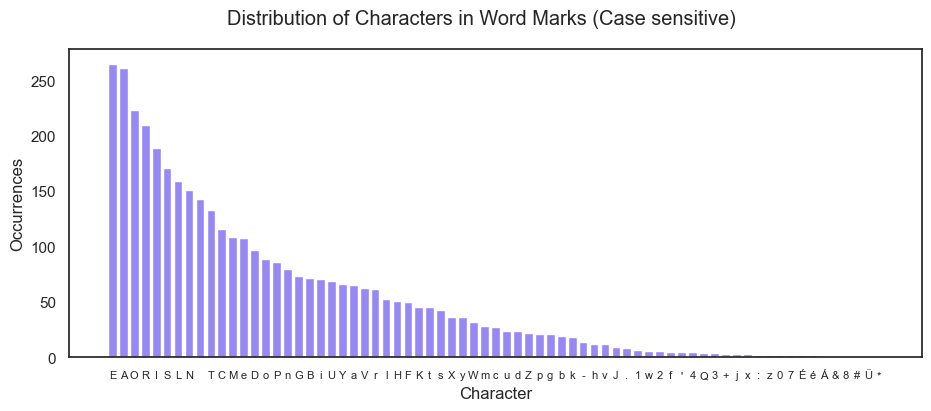

In [53]:
fig = plt.figure(figsize=(11,4))
plt.bar(alphabet.keys(), alphabet.values(), color='#9789f3')
fig.suptitle('Distribution of Characters in Word Marks (Case sensitive)')
plt.xlabel('Character')
plt.ylabel('Occurrences')
plt.xticks(fontsize=8)
fig.savefig('./dataset stats/alphabet_case_sensitive.jpg')

In [30]:
word_marks = df.loc[df['Type'] == 'word']

alphabet_insensitive = {}

contested_marks_list = word_marks['Contested Trademark']
earlier_marks_list = word_marks['Earlier Trademark']

all_word_marks = list(set(contested_marks_list + earlier_marks_list))

for m in all_word_marks:
    for c in m:
        c = c.lower()
        if c not in alphabet_insensitive:
            alphabet_insensitive[c] = 1
        else:
            alphabet_insensitive[c] = alphabet_insensitive[c] + 1

alphabet_insensitive = {k: v for k, v in sorted(alphabet_insensitive.items(), key=lambda item: item[1], reverse=True)}
alphabet_insensitive

{'e': 373,
 'a': 326,
 'o': 312,
 'r': 272,
 'i': 260,
 'n': 231,
 's': 214,
 'l': 212,
 't': 178,
 ' ': 143,
 'c': 143,
 'm': 137,
 'd': 121,
 'p': 107,
 'y': 102,
 'g': 94,
 'u': 93,
 'b': 91,
 'v': 75,
 'h': 63,
 'k': 63,
 'f': 55,
 'x': 39,
 'w': 38,
 'z': 24,
 '-': 14,
 'j': 12,
 '.': 8,
 '1': 7,
 '2': 6,
 "'": 5,
 '4': 5,
 'q': 4,
 '3': 4,
 'é': 4,
 '+': 3,
 ':': 2,
 '0': 2,
 '7': 2,
 'á': 1,
 '&': 1,
 '8': 1,
 '#': 1,
 'ü': 1,
 '*': 1}

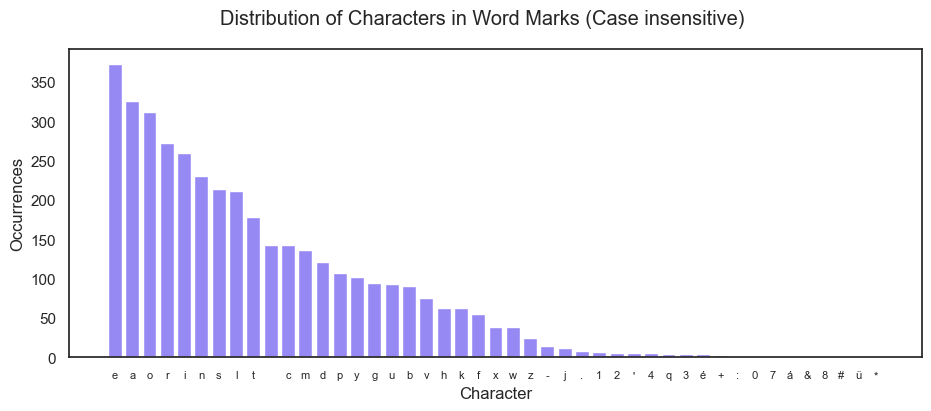

In [51]:
fig = plt.figure(figsize=(11,4))
plt.bar(alphabet_insensitive.keys(), alphabet_insensitive.values(), color='#9789f3')
fig.suptitle('Distribution of Characters in Word Marks (Case insensitive)')
plt.xlabel('Character')
plt.ylabel('Occurrences')
plt.xticks(fontsize=8)
fig.savefig('./dataset stats/alphabet_case_insensitive.jpg')

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

word_marks = df.loc[df['Type'] == 'word']
contested_marks_list = word_marks['Contested Trademark']
earlier_marks_list = word_marks['Earlier Trademark']

all_word_marks = list(set(contested_marks_list + earlier_marks_list))

word_mark_lengths = [len(w) for w in all_word_marks]

w_stats = {
    'mean': np.mean(word_mark_lengths),
    'median': np.median(word_mark_lengths),
    'std': np.std(word_mark_lengths),
    'min': np.min(word_mark_lengths),
    'max': np.max(word_mark_lengths),
    'var': np.var(word_mark_lengths),
    '.25-q': np.quantile(word_mark_lengths, q=.25),
    '.75-q': np.quantile(word_mark_lengths, q=.75)
}

w_stats

{'mean': 15.587044534412955,
 'median': 14.0,
 'std': 6.96023364541927,
 'min': 4,
 'max': 64,
 'var': 48.44485239882641,
 '.25-q': 11.0,
 '.75-q': 18.0}

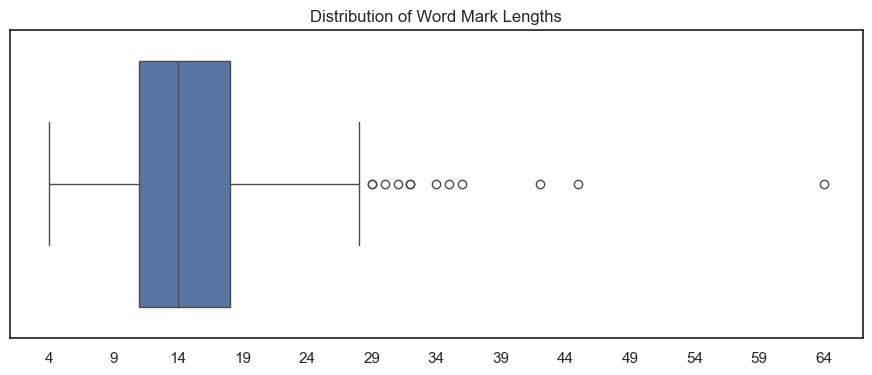

In [33]:
plt.rcParams['axes.grid'] = False

plt.figure(figsize=(11,4))
#sns.heatmap(corr, cmap="Greens" ,annot=True, fmt='.4f')
sns.set_theme(style='white')
h = sns.boxplot(x=word_mark_lengths)

h.set_xticks(range(min(word_mark_lengths), max(word_mark_lengths)+1, 5), labels=range(min(word_mark_lengths), max(word_mark_lengths)+1, 5))
h.set_title('Distribution of Word Mark Lengths')
h.figure.savefig('./dataset stats/word_mark_length.png', bbox_inches='tight', pad_inches=0.3)

In [45]:
word_marks = df.loc[df['Type'] == 'word']

character_positions_insensitive = {}

contested_marks_list = word_marks['Contested Trademark']
earlier_marks_list = word_marks['Earlier Trademark']

all_word_marks = list(set(contested_marks_list + earlier_marks_list))

for m in all_word_marks:
    for i, c in enumerate(m):
        c = c.lower()
        if c not in character_positions_insensitive:
            character_positions_insensitive[c] = [i]
        else:
            character_positions_insensitive[c].append(i)

character_positions_insensitive = {k: v for k, v in sorted(character_positions_insensitive.items(), key=lambda item: np.std(item[1]), reverse=True)}
character_positions_insensitive

{'c': [9,
  17,
  0,
  5,
  0,
  7,
  17,
  2,
  7,
  3,
  22,
  0,
  9,
  5,
  16,
  6,
  17,
  3,
  11,
  7,
  16,
  19,
  31,
  38,
  1,
  3,
  5,
  7,
  13,
  18,
  8,
  14,
  3,
  0,
  6,
  2,
  6,
  5,
  7,
  12,
  6,
  9,
  0,
  2,
  0,
  9,
  8,
  0,
  7,
  9,
  0,
  5,
  3,
  11,
  7,
  13,
  0,
  3,
  0,
  0,
  4,
  7,
  11,
  6,
  14,
  0,
  5,
  1,
  7,
  15,
  4,
  10,
  6,
  14,
  0,
  9,
  18,
  37,
  7,
  5,
  14,
  14,
  21,
  37,
  40,
  47,
  62,
  0,
  12,
  2,
  8,
  2,
  13,
  0,
  11,
  4,
  1,
  9,
  4,
  10,
  0,
  1,
  6,
  7,
  2,
  11,
  7,
  6,
  14,
  0,
  12,
  0,
  7,
  0,
  8,
  10,
  18,
  5,
  10,
  6,
  10,
  10,
  0,
  4,
  13,
  2,
  10,
  0,
  14,
  0,
  3,
  2,
  29,
  6,
  6,
  4,
  10,
  6,
  0,
  9,
  1,
  7,
  13],
 't': [0,
  6,
  10,
  3,
  8,
  11,
  2,
  3,
  11,
  0,
  6,
  6,
  15,
  22,
  10,
  5,
  12,
  6,
  12,
  8,
  17,
  10,
  3,
  14,
  3,
  6,
  5,
  33,
  36,
  5,
  10,
  12,
  2,
  7,
  15,
  2,
  12,
  4,
  6,
  3,
  9,
  3,

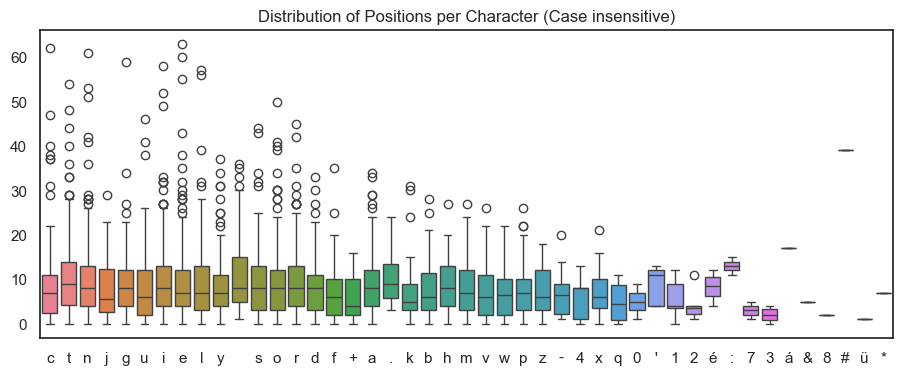

In [49]:
plt.rcParams['axes.grid'] = False

plt.figure(figsize=(11,4))
#sns.heatmap(corr, cmap="Greens" ,annot=True, fmt='.4f')
sns.set_theme(style='white')
h = sns.boxplot(data=character_positions_insensitive)

h.set_title('Distribution of Positions per Character (Case insensitive)')
h.figure.savefig('./dataset stats/word_mark_char_position_insensitive.png', bbox_inches='tight', pad_inches=0.3)

In [47]:
word_marks = df.loc[df['Type'] == 'word']

character_positions = {}

contested_marks_list = word_marks['Contested Trademark']
earlier_marks_list = word_marks['Earlier Trademark']

all_word_marks = list(set(contested_marks_list + earlier_marks_list))

for m in all_word_marks:
    for i, c in enumerate(m):
        if c not in character_positions:
            character_positions[c] = [i]
        else:
            character_positions[c].append(i)

character_positions = {k: v for k, v in sorted(character_positions.items(), key=lambda item: np.std(item[1]), reverse=True)}
character_positions

{'c': [9,
  5,
  2,
  3,
  7,
  16,
  38,
  14,
  9,
  3,
  4,
  6,
  14,
  0,
  18,
  5,
  21,
  37,
  40,
  47,
  62,
  2,
  4,
  10,
  10,
  13,
  10],
 'g': [2, 6, 3, 2, 27, 8, 10, 9, 15, 12, 34, 59, 7, 11, 6, 3, 7, 3, 12, 2, 4],
 'n': [9,
  14,
  8,
  14,
  0,
  11,
  3,
  3,
  2,
  6,
  4,
  10,
  24,
  41,
  5,
  26,
  7,
  13,
  5,
  2,
  3,
  8,
  9,
  7,
  4,
  1,
  1,
  12,
  18,
  5,
  2,
  3,
  12,
  7,
  4,
  9,
  2,
  8,
  11,
  10,
  7,
  13,
  22,
  1,
  5,
  10,
  16,
  25,
  28,
  36,
  42,
  51,
  53,
  61,
  6,
  3,
  4,
  3,
  5,
  8,
  3,
  4,
  5,
  15,
  16,
  18,
  2,
  6,
  2,
  7,
  1,
  13,
  2,
  6,
  7,
  1,
  7,
  2,
  9,
  10],
 't': [5,
  12,
  33,
  15,
  12,
  3,
  13,
  6,
  25,
  6,
  5,
  16,
  1,
  10,
  12,
  19,
  15,
  4,
  12,
  17,
  15,
  2,
  7,
  18,
  22,
  29,
  44,
  48,
  54,
  0,
  3,
  5,
  9,
  3,
  19,
  3,
  12,
  0,
  5,
  9,
  14,
  3,
  9,
  10,
  3],
 'i': [8,
  13,
  7,
  3,
  1,
  12,
  3,
  1,
  2,
  1,
  4,
  3,
  5,
  32

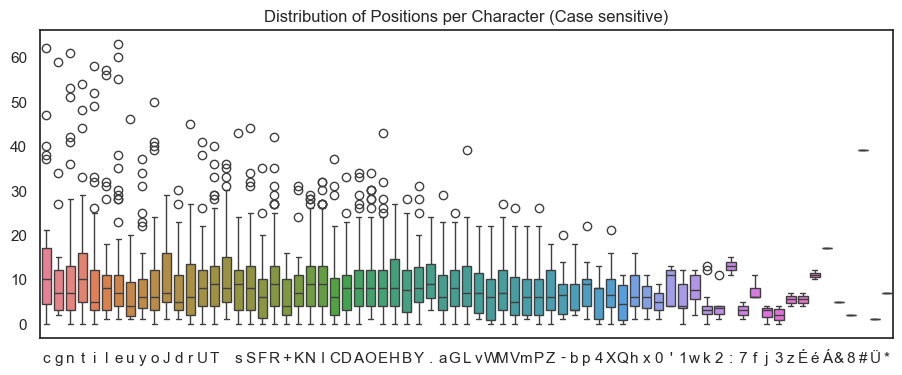

In [55]:
plt.rcParams['axes.grid'] = False

plt.figure(figsize=(11,4))
#sns.heatmap(corr, cmap="Greens" ,annot=True, fmt='.4f')
sns.set_theme(style='white')
h = sns.boxplot(data=character_positions)

h.set_title('Distribution of Positions per Character (Case sensitive)')
h.figure.savefig('./dataset stats/word_mark_char_position_sensitive.png', bbox_inches='tight', pad_inches=0.3)

## Figurative Marks

Figurative marks have images. These images can be compared by their aspect ratios, sizes, and colors.

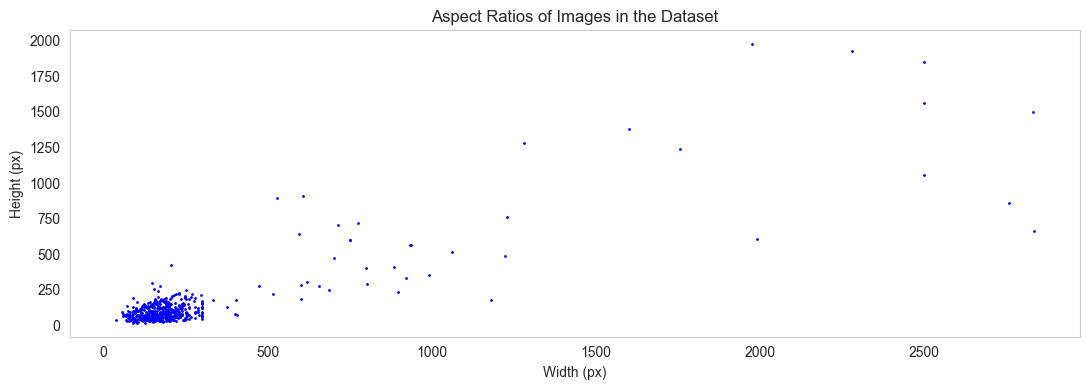

In [25]:
from glob import glob
import numpy as np
from PIL import Image
import cv2
plt.rcParams['axes.grid'] = False

plt.figure(figsize=(11, 4))
plt.xlabel('Width (px)')
plt.ylabel('Height (px)')
plt.title('Aspect Ratios of Images in the Dataset')

for im in glob('../TMSIM-500/Dataset Images/*'):
    im_path = im.replace('\\', '/')
    img = cv2.imread(im_path)
    (h, w) = img.shape[:2]
    plt.plot(w, h, 'b.', markersize=2)

plt.savefig(f'../dataset stats/image_aspect_ratios.png', bbox_inches='tight', pad_inches=0.3)

# Variable Distribution

Finally, we also want to know which values each variable has. We therefore compute common statistics and visualize them in different ways.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


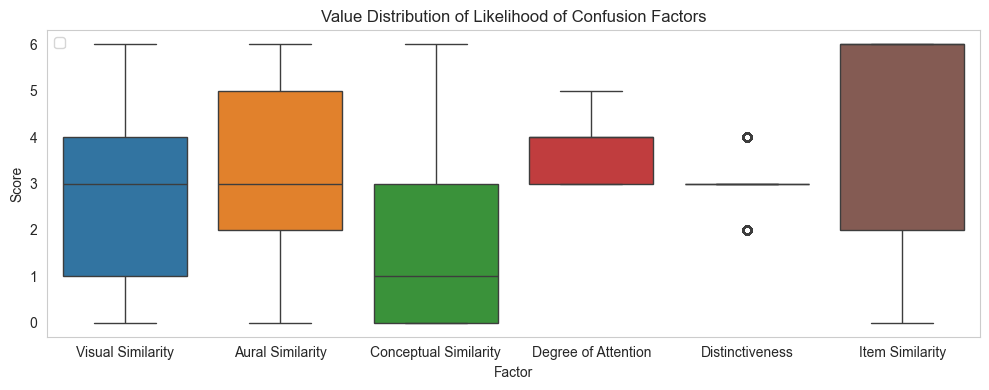

In [27]:
import seaborn as sns
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

columns = ['Visual Similarity', 'Aural Similarity', 'Conceptual Similarity', 'Degree of Attention', 'Distinctiveness', 'Item Similarity']

fig, ax = plt.subplots(figsize=(10, 4))

plt.title('Value Distribution of Likelihood of Confusion Factors')
plt.ylabel('Score')
plt.xlabel('Factor')
plt.xticks(rotation=0)

sns.boxplot(data = df[columns])
plt.legend()
plt.savefig(f'../dataset stats/variable_distribution.png', bbox_inches='tight', pad_inches=0.3)

# Comparisons per Trademark

Usually, an opposition case concerns multiple goods and services. Each contested good or services is compared separately to the goods and services of the earlier trademark.

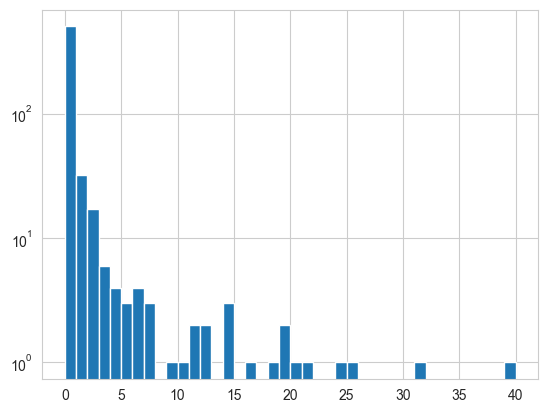

In [15]:
import matplotlib.pyplot as plt

s = np.bincount(list(df[['Case ID']].value_counts()))
plt.hist(s, bins=40, log=True)
plt.show()

In [3]:
gt = pd.read_csv('../TMSIM-500/data.csv', sep=',', encoding='utf-8')
gt.head(5)

,Type,Case ID,Contested Trademark,Earlier Trademark,Visual Similarity,Aural Similarity,Conceptual Similarity,Degree of Attention,Distinctiveness,Opposition Outcome,Item Similarity,Outcome,Contested Goods and Services,Earlier Goods and Services
0,word,003178074,TP HOME,TP,4.0,4.0,0.0,3.0,3.0,upheld,3,upheld,plates for diffusing aromatic oil,air fragrancing preparations
1,word,003178074,TP HOME,TP,4.0,4.0,0.0,3.0,3.0,upheld,3,upheld,aromatic oil diffusers other than reed diffuse...,air fragrancing preparations
2,word,003178074,TP HOME,TP,4.0,4.0,0.0,3.0,3.0,upheld,3,upheld,pomanders [containers],air fragrancing preparations
3,word,003178074,TP HOME,TP,4.0,4.0,0.0,3.0,3.0,upheld,3,upheld,containers for pot pourri,air fragrancing preparations
4,word,003178074,TP HOME,TP,4.0,4.0,0.0,3.0,3.0,upheld,3,upheld,perfume burners,air fragrancing preparations


In [2]:
df = pd.read_csv('../scripts/features.csv', sep=',', encoding='utf-8')
df.head(5)

,Case ID,Contested Trademark,Earlier Trademark,Contested Goods and Services,Earlier Goods and Services,damerau,four_cosine,four_jaccard,four_n_gram,four_overlap,...,metaphone3_three_overlap,metaphone3_three_q_gram,metaphone3_two_cosine,metaphone3_two_jaccard,metaphone3_two_n_gram,metaphone3_two_overlap,metaphone3_two_q_gram,conc_lev_wordnet,conc_cos_wordnet,conc_lcs_wordnet
0,003178074,TP HOME,TP,plates for diffusing aromatic oil,air fragrancing preparations,5.0,0.0,0.0,0.714286,0.0,...,0.0,1.0,0.707107,0.5,0.333333,1.0,1.0,0.166667,0.117647,0.117647
1,003178074,TP HOME,TP,aromatic oil diffusers other than reed diffuse...,air fragrancing preparations,5.0,0.0,0.0,0.714286,0.0,...,0.0,1.0,0.707107,0.5,0.333333,1.0,1.0,0.166667,0.117647,0.117647
2,003178074,TP HOME,TP,pomanders [containers],air fragrancing preparations,5.0,0.0,0.0,0.714286,0.0,...,0.0,1.0,0.707107,0.5,0.333333,1.0,1.0,0.166667,0.117647,0.117647
3,003178074,TP HOME,TP,containers for pot pourri,air fragrancing preparations,5.0,0.0,0.0,0.714286,0.0,...,0.0,1.0,0.707107,0.5,0.333333,1.0,1.0,0.166667,0.117647,0.117647
4,003178074,TP HOME,TP,perfume burners,air fragrancing preparations,5.0,0.0,0.0,0.714286,0.0,...,0.0,1.0,0.707107,0.5,0.333333,1.0,1.0,0.166667,0.117647,0.117647


In [5]:
vis_features = [c for c in df.columns[5:] if not c.startswith('metaphone') and not c.startswith('conc_')]

In [9]:
correlations = {}

for f in vis_features:
    correlations[f] = gt['Outcome'].corr(df[f])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
from keras.models import Model
import cv2
import keras

vgg16 = keras.applications.VGG16(weights='imagenet', include_top=True, pooling='max', input_shape=(224, 224, 3))

vgg19 = keras.applications.VGG19(weights='imagenet', include_top=True, pooling='max', input_shape=(224, 224, 3))

resnet50 = keras.applications.ResNet50(weights='imagenet', include_top=True, pooling='max', input_shape=(224, 224, 3))

basemodel_vgg16 = Model(inputs=vgg16.input, outputs=vgg16.get_layer('fc2').output)
basemodel_vgg19 = Model(inputs=vgg19.input, outputs=vgg19.get_layer('fc2').output)
basemodel_resnet50 = Model(inputs=resnet50.input, outputs=resnet50.get_layer('predictions').output)

models = {
    'vgg16': basemodel_vgg16,
    'vgg19': basemodel_vgg19,
    'resnet50': basemodel_resnet50
}

def get_feature_vector(img, model: str):
    img1 = cv2.resize(img, (224, 224))
    curr_model = models[model]
    feature_vector = curr_model.predict(img1.reshape(1, 224, 224, 3))
    return feature_vector

def calculate_similarity(vector1, vector2):
    return cosine_similarity(vector1, vector2)

In [58]:
from glob import glob
import pandas as pd

df = pd.read_csv('./features_full.csv', sep=',', encoding='utf-8')

id_to_img_files = {}
img_files = glob('../TMSIM-500/Dataset Images/*')
for f in img_files:
    f = f.replace('\\', '/')
    id = f.split('/')[-1].split('_')[0]
    if id not in id_to_img_files:
        id_to_img_files[id] = [f]
    else:
        id_to_img_files[id].append(f)

case_id_img_similarity = {}

for i, row in df.iterrows():
    id = row['Case ID']
    if '-' in id:
        id = id.split('-')[0]
    for model in ['vgg16', 'vgg19', 'resnet50']:
        if np.isnan(row[f'{model}_img_sim']):
            if model not in case_id_img_similarity:
                case_id_img_similarity[model] = {}
            if id not in case_id_img_similarity[model]:
                if id in id_to_img_files:
                    imgs = id_to_img_files[id]
                    img1 = cv2.imread(imgs[0])
                    img2 = cv2.imread(imgs[1])
                    sim = calculate_similarity(get_feature_vector(img1, model), get_feature_vector(img2, model))
                    df.loc[i, f'{model}_img_sim'] = sim
                    case_id_img_similarity[model][id] = sim
            else:
                df.loc[i, f'{model}_img_sim'] = case_id_img_similarity[model][id]

1/1 [==============================] - 0s 130ms/step


In [56]:
df

,Case ID,Contested Trademark,Earlier Trademark,Contested Goods and Services,Earlier Goods and Services,damerau,four_cosine,four_jaccard,four_n_gram,four_overlap,...,metaphone3_two_overlap,metaphone3_two_q_gram,conc_lev_wordnet,conc_cos_wordnet,conc_lcs_wordnet,vgg16_img_sim,vgg19_img_sim,resnet50_img_sim,google_item_similarity,spacy_item_similarity
0,003178074,TP HOME,TP,plates for diffusing aromatic oil,air fragrancing preparations,5.0,0.000000,0.000000,0.714286,0.000000,...,1.00,1.0,0.166667,0.117647,0.117647,NaN,NaN,NaN,0.148532,0.219071
1,003178074,TP HOME,TP,aromatic oil diffusers other than reed diffuse...,air fragrancing preparations,5.0,0.000000,0.000000,0.714286,0.000000,...,1.00,1.0,0.166667,0.117647,0.117647,NaN,NaN,NaN,NaN,0.201852
2,003178074,TP HOME,TP,pomanders [containers],air fragrancing preparations,5.0,0.000000,0.000000,0.714286,0.000000,...,1.00,1.0,0.166667,0.117647,0.117647,NaN,NaN,NaN,NaN,0.273260
3,003178074,TP HOME,TP,containers for pot pourri,air fragrancing preparations,5.0,0.000000,0.000000,0.714286,0.000000,...,1.00,1.0,0.166667,0.117647,0.117647,NaN,NaN,NaN,NaN,0.147323
4,003178074,TP HOME,TP,perfume burners,air fragrancing preparations,5.0,0.000000,0.000000,0.714286,0.000000,...,1.00,1.0,0.166667,0.117647,0.117647,NaN,NaN,NaN,NaN,0.385672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11810,003166256,Lollipop Test,LOLLIPOP,body fat monitors,medical apparatus and instruments,6.0,0.565685,0.363636,0.544872,0.800000,...,1.00,1.0,0.190476,1.000000,1.000000,0.723595,0.774913,0.807310,NaN,0.145517
11811,003166256,Lollipop Test,LOLLIPOP,surgical robots,medical apparatus and instruments,6.0,0.565685,0.363636,0.544872,0.800000,...,1.00,1.0,0.190476,1.000000,1.000000,0.723595,0.774913,0.807310,NaN,0.245337
11812,003168304,SUN ENERGY GROUP,sunenergy,Photovoltaic apparatus for generating electricity,Photovoltaic cells; solar panels for electrici...,7.0,0.339683,0.187500,0.500000,0.500000,...,1.00,0.0,0.200000,1.000000,1.000000,0.620244,0.602973,0.394432,NaN,0.785544
11813,003165296,Red Pill IT Solutions,REDPILL LINPRO,Development and design of computer software,Software development,14.0,0.071067,0.035714,0.706349,0.090909,...,0.75,2.0,0.181818,0.200000,0.117647,0.666533,0.487492,0.676024,NaN,0.761139


In [22]:
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import spacy_universal_sentence_encoder
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
    return model(input)

google_model = hub.load(module_url)
spacy_model = spacy_universal_sentence_encoder.load_model('en_use_lg')

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [27]:
google_model(['hi'])

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[-0.00544353, -0.06554598,  0.05282402,  0.00214572,  0.0749642 ,
         0.04734778,  0.04078623, -0.04632169,  0.06859942,  0.06285613,
         0.06513645,  0.06309724,  0.00740179,  0.08193041, -0.0012035 ,
        -0.03783087, -0.01265768,  0.04318311,  0.02056728, -0.06572782,
        -0.02300972,  0.04072278,  0.02154249,  0.05614452, -0.0518525 ,
         0.02722054,  0.03106933, -0.06861348, -0.00157117, -0.01333024,
         0.04444548,  0.05531958,  0.0062472 , -0.05633743, -0.04757319,
         0.03495563,  0.00234728,  0.03456709,  0.04704014, -0.01008805,
        -0.0273277 ,  0.02955943,  0.03160089,  0.00209064,  0.00055128,
         0.04377316, -0.0727887 , -0.05129093, -0.00995852, -0.00097401,
        -0.05456083,  0.01019395,  0.03405061,  0.04277835, -0.0144466 ,
         0.00823192,  0.06989378, -0.03751609, -0.02304461,  0.04888563,
         0.04895834, -0.04222427,  0.04345509,  0.0326507 ,  0.06233858,
 

In [34]:
import spacy_universal_sentence_encoder
import math

mod_dict = {
    'google': google_model,
    'spacy': spacy_model
}


def get_item_similarity(contested, earlier, mod_name):
    earlier_list = earlier.split(';')
    sim = 0
    mod = mod_dict[mod_name]
    c_emb = mod(contested)
    for e in earlier_list:
        e_emb = mod(e)
        curr_sim = c_emb.similarity(e_emb)
        if sim < curr_sim:
            sim = curr_sim
    return sim

for i, row in df.iterrows():
    for mod in ['spacy']:
        df.loc[i, f'{mod}_item_similarity'] = get_item_similarity(row['Contested Goods and Services'], row['Earlier Goods and Services'], mod)

In [59]:
df.to_csv('features.csv', sep=',', encoding='utf-8', index=False)

In [60]:
cols = [c for c in df.columns if c not in ['google_item_similarity', 'Case ID', 'Contested Trademark', 'Earlier Trademark', 'Contested Goods and Services', 'Earlier Goods and Services']]
fullX = df[cols]

wordX = fullX.loc[fullX['vgg16_img_sim'].isna()]
figX = fullX.loc[fullX['vgg16_img_sim'].notnull()]


In [61]:
cols = [c for c in wordX.columns if c not in ['vgg16_img_sim', 'vgg19_img_sim', 'resnet50_img_sim']]

wordX = wordX[cols]
wordX.to_csv('word_mark_X.csv', sep=',', encoding='utf-8', index=False)

In [62]:
cols = [c for c in figX.columns if c.startswith('metaphone') or c.startswith('conc_') or c.startswith('vgg') or c.startswith('resnet50') or c.startswith('spacy_')]
figX = figX[cols]

In [63]:
figX.to_csv('figurative_mark_X.csv', sep=',', encoding='utf-8', index=False)

In [50]:
df.to_csv('features_full.csv', sep=',', encoding='utf-8', index=False)